In [ ]:
import pandas as pd
import seaborn
import numpy as np

import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
data = pd.read_csv("stock_data.csv")
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


[Text(0, 0, '3685'), Text(0, 0, '2106')]

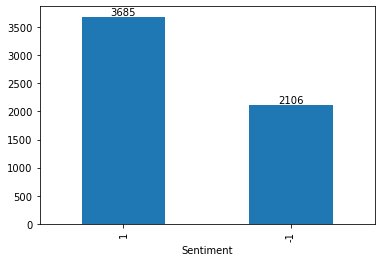

In [3]:
# data.value_counts(data["Sentiment"])
ax = data.value_counts(data["Sentiment"]).plot.bar()
ax.bar_label(ax.containers[0])
#Mainly positive sentiments

In [4]:
#Sentiment Analyser 
vader = SentimentIntensityAnalyzer()
dataVader = data
scores = dataVader['Text'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
dataVader = dataVader.join(scores_df, rsuffix='_right')
dataVader["predict"] = 1
dataVader["predict"][dataVader['neg'] > dataVader['pos']] = -1

/var/folders/cb/3rl907d510d6n8jh8vdyhhcc0000gn/T/ipykernel_50252/3156333961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataVader["predict"][dataVader['neg'] > dataVader['pos']] = -1


In [5]:
#Accuracy
import sklearn
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
sum(dataVader["predict"] == dataVader["Sentiment"])/5791
y_test = dataVader["Sentiment"]
prediction = dataVader["predict"]

print('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction))
print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 0.6641340010360904
F1 score: 0.7617881200244948
Recall: 0.8439620081411127
Precision: 0.6941964285714286

 confussion matrix:
 [[ 736 1370]
 [ 575 3110]]
